# CoDe 1161 Presentation
# Taking a look at Spotify Statistics between 2017 and 2020 :music

Done by: Casmie Tee (z5470690)

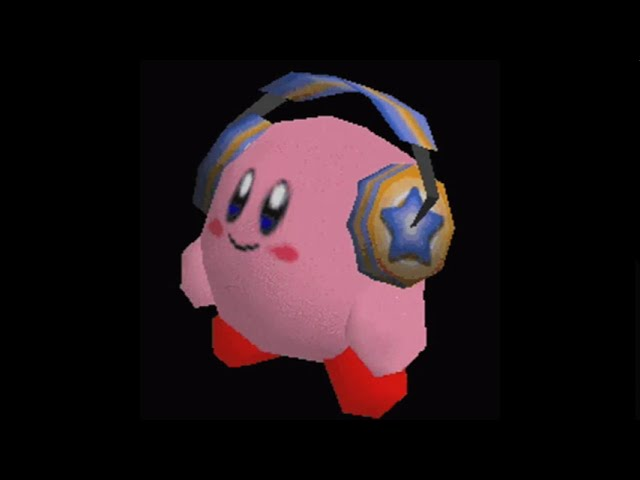

# Introduction on the Dataset

There's two Datasets being used, 

One being spotify_data_popularity.csv

And the other being spotify_data_specifics.csv

# QUESTIONS I was asking myself 

MAIN question was: 

WHAT are the characteristics of a hit song?

Was it the emotions?
Was it just a numbers game?
What kind of vibe is it?

import libraries that I think are useful?

In [252]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import dataset

In [253]:
%matplotlib inline
columns_to_include = ['country', 'date', 'position', 'track', 'title', 'artist']
spotifyPopularity_data = pd.read_csv("spotify_data_charts.csv", usecols=columns_to_include)

dtype_specifc = {
        "Artist_followers": object,
        "Explicit": object,
        "Track_number": object,
        "Tracks_in_album": object,
        "danceability": object, 
        "energy": object, 
        "key": object, 
        "loudness": object, 
        "mode": object, 
        "speechiness": object, 
        "acoustics": object, 
        "instrumentalness": object, 
        "liveliness": object, 
        "valence": object, 
        "tempo": object, 
        "duration_ms": object,
        "time_signature": object
    }

spotifySpecifics_data = pd.read_csv("spotify_data_specifics.csv", dtype=dtype_specifc)

# Convert 'Explicit' to boolean, because the given data is in uppercase 
spotifySpecifics_data['Explicit'] = spotifySpecifics_data['Explicit'].map(lambda x: str(x).strip().lower() in ['true'])

# Convert all number related data to numeric, and coerce errors by setting values to NaN
spotifySpecifics_data['Artist_followers'] = pd.to_numeric(spotifySpecifics_data['Artist_followers'], errors='coerce')
spotifySpecifics_data['Track_number'] = pd.to_numeric(spotifySpecifics_data['Track_number'], errors='coerce')
spotifySpecifics_data['Tracks_in_album'] = pd.to_numeric(spotifySpecifics_data['Tracks_in_album'], errors='coerce')
spotifySpecifics_data['danceability'] = pd.to_numeric(spotifySpecifics_data['danceability'], errors='coerce')
spotifySpecifics_data['energy'] = pd.to_numeric(spotifySpecifics_data['energy'], errors='coerce')
spotifySpecifics_data['key'] = pd.to_numeric(spotifySpecifics_data['key'], errors='coerce')
spotifySpecifics_data['loudness'] = pd.to_numeric(spotifySpecifics_data['loudness'], errors='coerce')
spotifySpecifics_data['mode'] = pd.to_numeric(spotifySpecifics_data['mode'], errors='coerce')
spotifySpecifics_data['speechiness'] = pd.to_numeric(spotifySpecifics_data['speechiness'], errors='coerce')
spotifySpecifics_data['acoustics'] = pd.to_numeric(spotifySpecifics_data['acoustics'], errors='coerce')
spotifySpecifics_data['instrumentalness'] = pd.to_numeric(spotifySpecifics_data['instrumentalness'], errors='coerce')
spotifySpecifics_data['liveliness'] = pd.to_numeric(spotifySpecifics_data['liveliness'], errors='coerce')
spotifySpecifics_data['valence'] = pd.to_numeric(spotifySpecifics_data['valence'], errors='coerce')
spotifySpecifics_data['tempo'] = pd.to_numeric(spotifySpecifics_data['tempo'], errors='coerce')
spotifySpecifics_data['duration_ms'] = pd.to_numeric(spotifySpecifics_data['duration_ms'], errors='coerce')
spotifySpecifics_data['time_signature'] = pd.to_numeric(spotifySpecifics_data['time_signature'], errors='coerce')


In [254]:
spotifyPopularity_data.head()

,country,date,position,track,title,artist
0,Global,05/11/2020,1.0,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,Global,05/11/2020,2.0,"positions , Ariana Grande",positions,Ariana Grande
2,Global,05/11/2020,3.0,"Mood , 24kGoldn",Mood,24kGoldn
3,Global,05/11/2020,4.0,"Lemonade , Internet Money",Lemonade,Internet Money
4,Global,05/11/2020,5.0,"Lonely , Justin Bieber",Lonely,Justin Bieber


In [255]:
diff_countries = spotifyPopularity_data['country'].unique()

for i in diff_countries:
    print(f"- {i}")

- Global
- USA
- UK
- Argentina
- Austria
- Australia
- Belgium
- Brazil
- Canada
- Switzerland
- Chile
- Colombia
- Costa Rica
- Germany
- Denmark
- Ecuador
- Spain
- Finland
- France
- Indonesia
- Ireland
- Italy
- Mexico
- Malaysia
- Netherlands
- Norway
- New Zealand
- Peru
- Philippines
- Poland
- Portugal
- Sweden
- Singapore
- Turkey
- Taiwan
- nan


In [256]:
spotifySpecifics_data.head()

,Country,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,...,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,LDA_Topic,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,5/11/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,10,1,1,global
1,USA,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,5/11/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,191,0,0,english speaking and nordic
2,Argentina,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,5/11/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,spanish speaking
3,Belgium,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,5/11/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,126,0,0,english speaking and nordic
4,Switzerland,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,5/11/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,21,0,1,english speaking and nordic


In [257]:
columns = []  

total_columns = len(spotifySpecifics_data.columns)

for i in range(12, 22):
    columns.append(spotifySpecifics_data.columns[i])  

for column in columns: 
    print(f"- {column}")

print(f"- {spotifySpecifics_data.columns[25]}")

- danceability
- energy
- key
- loudness
- mode
- speechiness
- acoustics
- instrumentalness
- liveliness
- valence
- Genre_new


# What is Valence?

A scale of 0 to 1.0 measuring how happy or sad a song is, 1 being the happiest and 0 being the saddest. 

In [258]:
columns = []  

# Total number of columns
total_columns = len(spotifySpecifics_data.columns)

# Loop through and print columns in batches
for i in range(33, 44):
    columns.append(spotifySpecifics_data.columns[i])  

for column in columns: 
    print(f"- {column}")

- syuzhet
- anger
- anticipation
- disgust
- fear
- joy
- sadness
- surprise
- trust
- negative
- positive


# What is Syuzhet?

Suyzhet is an R Library that can take in a sentence and calculate the sentiment value of it, so Syuzhet represents how sentimental a song is.

In [259]:
columns = []  

total_columns = len(spotifySpecifics_data.columns)

for i in range(67, 73):
    columns.append(spotifySpecifics_data.columns[i])  

for column in columns: 
    print(f"- {column}")

- Bayes
- LDA_Topic
- Popu_max
- Top10_dummy
- Top50_dummy
- Cluster


# What is Bayes and LDA_Topic

Bayes - Tone of the lyrics e.g. negative, neutral, positive

LDA_Topic - Topic of the lyrics based on the categories of Love, Thug, Nostalgia, Explore, Fun, Desire, Hope and Celebration

# SO to recap.. 

### Valence 
How happy or sad a song is

### Syuzhet
How sentimental a song is

### Bayes 
Tone of lyrics 

### LDA_Topic 
Topic of Lyrics


# Without further ado do, 
## What was the most popular song between 2017 and 2020?

What are the characteristics of the song?

In [310]:
# Finding the most popular song 
mostPopular_score = spotifySpecifics_data['Popularity'].max()
mostPopular_song = spotifySpecifics_data[spotifySpecifics_data['Popularity'] == mostPopular_score]


In [311]:
print(mostPopular_song['Title'].values[0])

shape of you


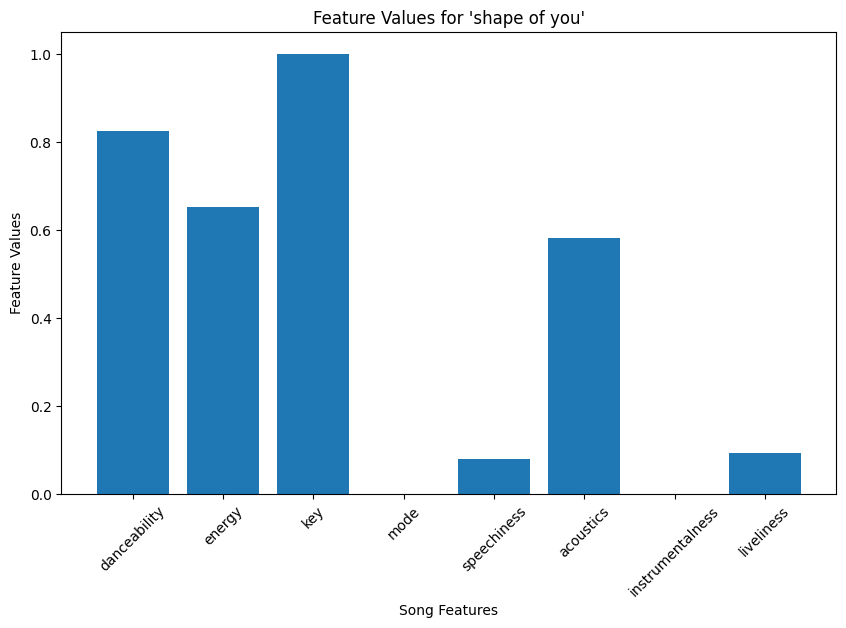

In [312]:
song_features_columns = ['danceability', 'energy', 'key', 'mode',
                        'speechiness', 'acoustics', 'instrumentalness', 'liveliness']

popular_songFeatures = mostPopular_song[song_features_columns].iloc[0]

# Adding labels and title
plt.figure(figsize=(10, 6))
plt.bar(popular_songFeatures.index, popular_songFeatures.values)
plt.xlabel('Song Features')
plt.ylabel('Feature Values')
plt.title(f"Feature Values for '{mostPopular_song['Title'].values[0]}'")
plt.xticks(rotation=45)
plt.show()

# What about the emotions?

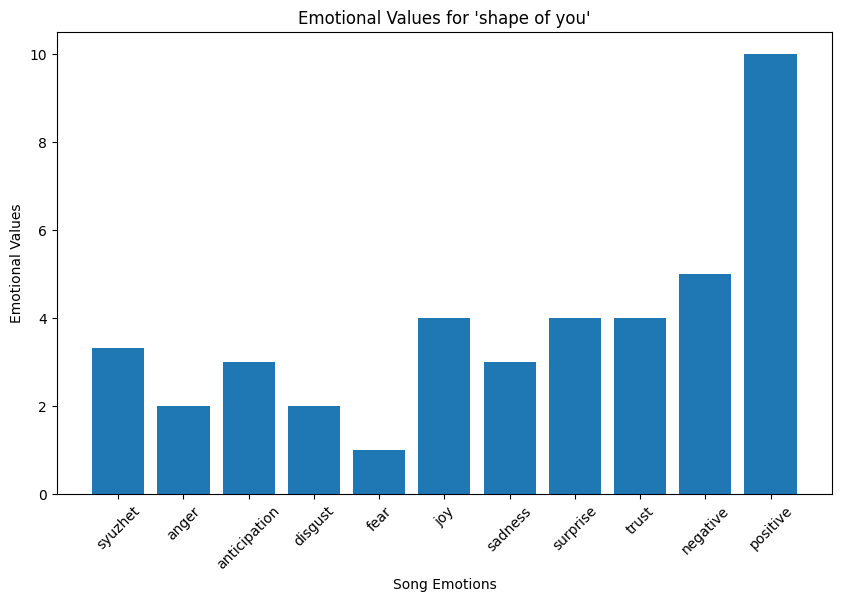

In [315]:
song_features_columns = ['syuzhet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 
                        'surprise', 'trust',	'negative', 'positive']


popular_songEmotions = mostPopular_song[song_features_columns].iloc[0]

plt.figure(figsize=(10, 6))
plt.bar(popular_songEmotions.index, popular_songEmotions.values)
plt.xlabel('Song Emotions')
plt.ylabel('Emotional Values')
plt.title(f"Emotional Values for '{mostPopular_song['Title'].values[0]}'")
plt.xticks(rotation=45)
plt.show()

# Observations made (no.1):

We can see that Shape of You by Ed Sheeran is a really positive song, but let's look at the song trends throughout the years to see
if this trend holds up

In [264]:
# We are going to find the recurring songs for every three months between 2017 to 2020 
spotifyPopularity_data['date'] = pd.to_datetime(spotifyPopularity_data['date'], dayfirst=True)

spotifyPopularity_data['quarter'] = spotifyPopularity_data['date'].dt.to_period('Q')

song_counts = spotifyPopularity_data.groupby(['quarter', 'title', 'artist']).size().reset_index(name='count')

most_recurring_songs = song_counts.loc[song_counts.groupby('quarter')['count'].idxmax()]

# Select relevant columns to display
result = most_recurring_songs[['quarter', 'title', 'artist', 'count']]

# Print the result
print(result)

       quarter              title                          artist  count
993     2017Q1            Closer        The Chainsmokers, Halsey    3109
8705    2017Q2      It Ain't Me                             Kygo    3077
12875   2017Q3         Attention                    Charlie Puth    3215
21290   2017Q4            Havana      Camila Cabello, Young Thug    3213
32052   2018Q1      Shape of You                      Ed Sheeran    3147
35925   2018Q2           FRIENDS          Marshmello, Anne-Marie    3181
43686   2018Q3   Girls Like You                         Maroon 5    3212
55526   2018Q4        Taki Taki                         DJ Snake    3214
64454   2019Q1            thank u           next , Ariana Grande    3122
71769   2019Q2           bad guy                   Billie Eilish    3182
77502   2019Q3          Señorita    Shawn Mendes, Camila Cabello    3218
85728   2019Q4          Señorita    Shawn Mendes, Camila Cabello    3209
89552   2020Q1      Dance Monkey                   

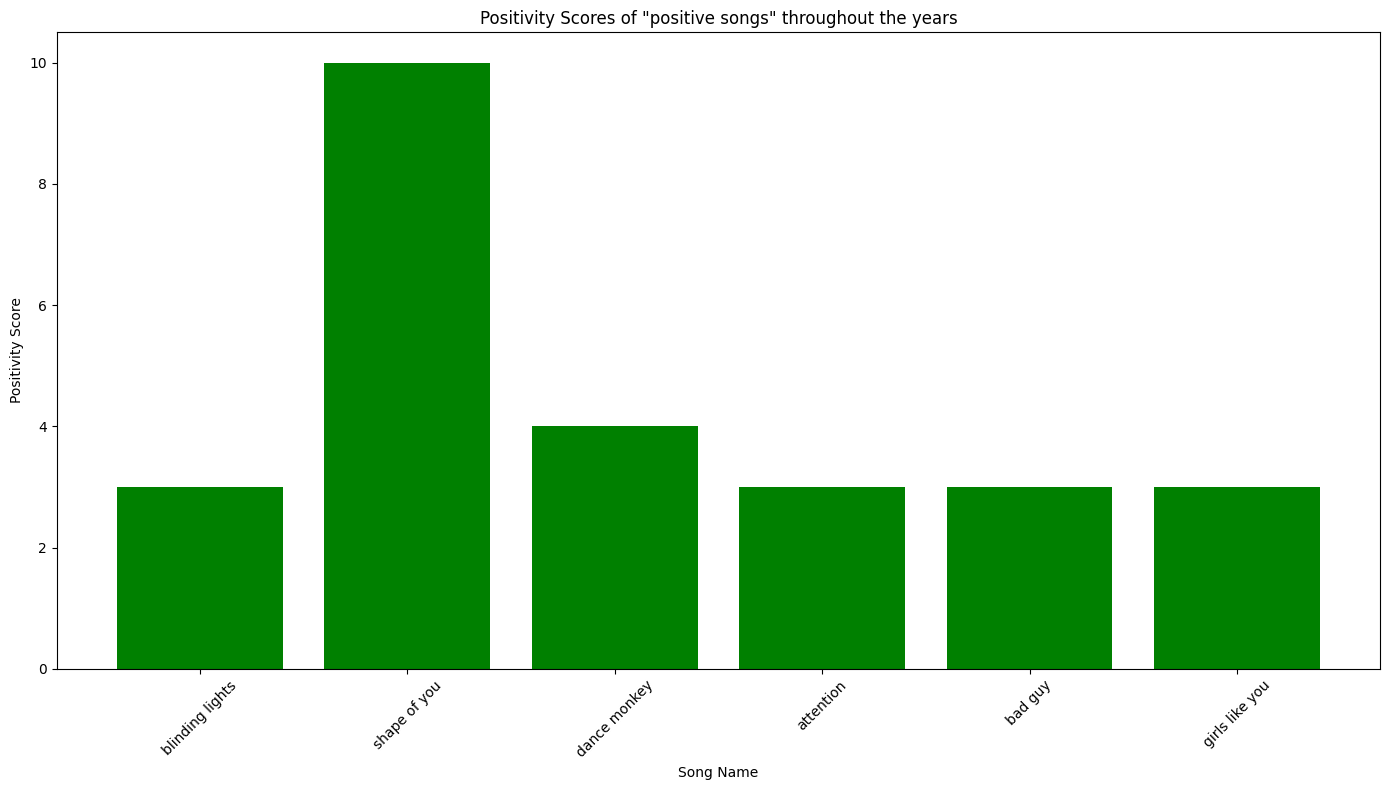

In [265]:
positive_songs_pastYears = ['closer', "it aint me", "attention", "havana", "shape of you", "friends", "girls like you", "taki taki",
                        'thank u, next', 'bad guy', 'Senorita', 'dance monkey', 'blinding lights', 'wap']


# this array is defined because there are same song titles 
artist_name = ['The Chainsmokers', 'Kygo', 'Charlie Puth', 'Camila Cabello', 'Ed Sheeran', 'Marshmello', 'Maroon 5', 'DJ Snake',
               'Ariana Grande', 'Billie Eilish', 'Shawn Mendes', 'Tones And I', 'The Weeknd', 'Cardi B']

songs_artists_dict = dict(zip(positive_songs_pastYears, artist_name))

positive_song_artists = pd.DataFrame(list(songs_artists_dict.items()), columns=['Title', 'Artist'])

# Merge the spotifySpecifics data to get positive values
# with positive_song_artists
filtered_data = spotifySpecifics_data.merge(positive_song_artists, how='inner', on=['Title', 'Artist'])

bar_data = filtered_data[['Title', 'positive']]

plt.figure(figsize=(14, 8))  
plt.bar(bar_data['Title'], bar_data['positive'], color='green')
plt.xlabel('Song Name')
plt.ylabel('Positivity Score')
plt.title('Positivity Scores of "positive songs" throughout the years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

# Observations made (no.2):

Seems like being positive isn't the only factor in being a popular song, so let's look at the first graph again and look at what 
we can investigate

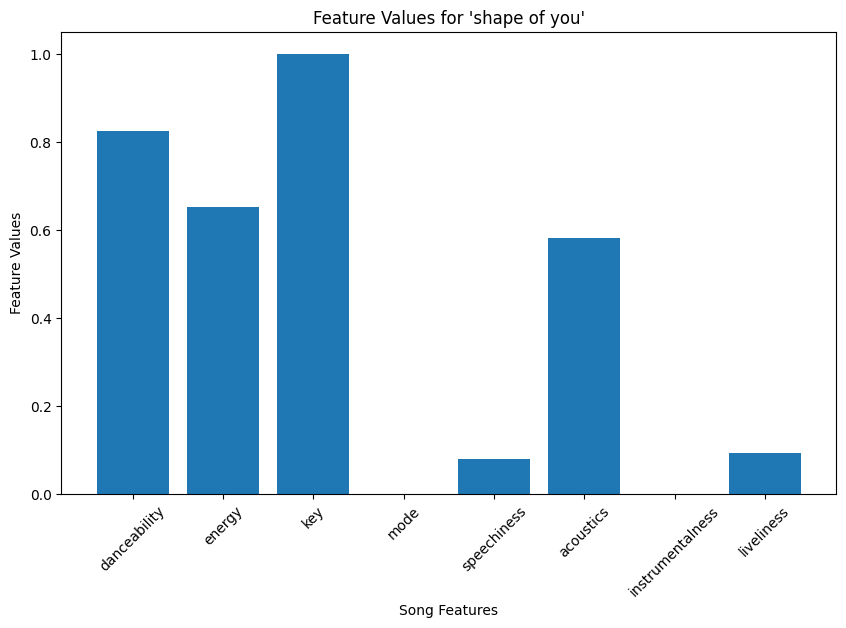

In [266]:
song_features_columns = ['danceability', 'energy', 'key', 'mode',
                        'speechiness', 'acoustics', 'instrumentalness', 'liveliness']

popular_songFeatures = mostPopular_song[song_features_columns].iloc[0]

# Adding labels and title
plt.figure(figsize=(10, 6))
plt.bar(popular_songFeatures.index, popular_songFeatures.values)
plt.xlabel('Song Features')
plt.ylabel('Feature Values')
plt.title(f"Feature Values for '{mostPopular_song['Title'].values[0]}'")
plt.xticks(rotation=45)
plt.show()

We can see that Danceability is the next best attribute, so let's dive a little deeper 

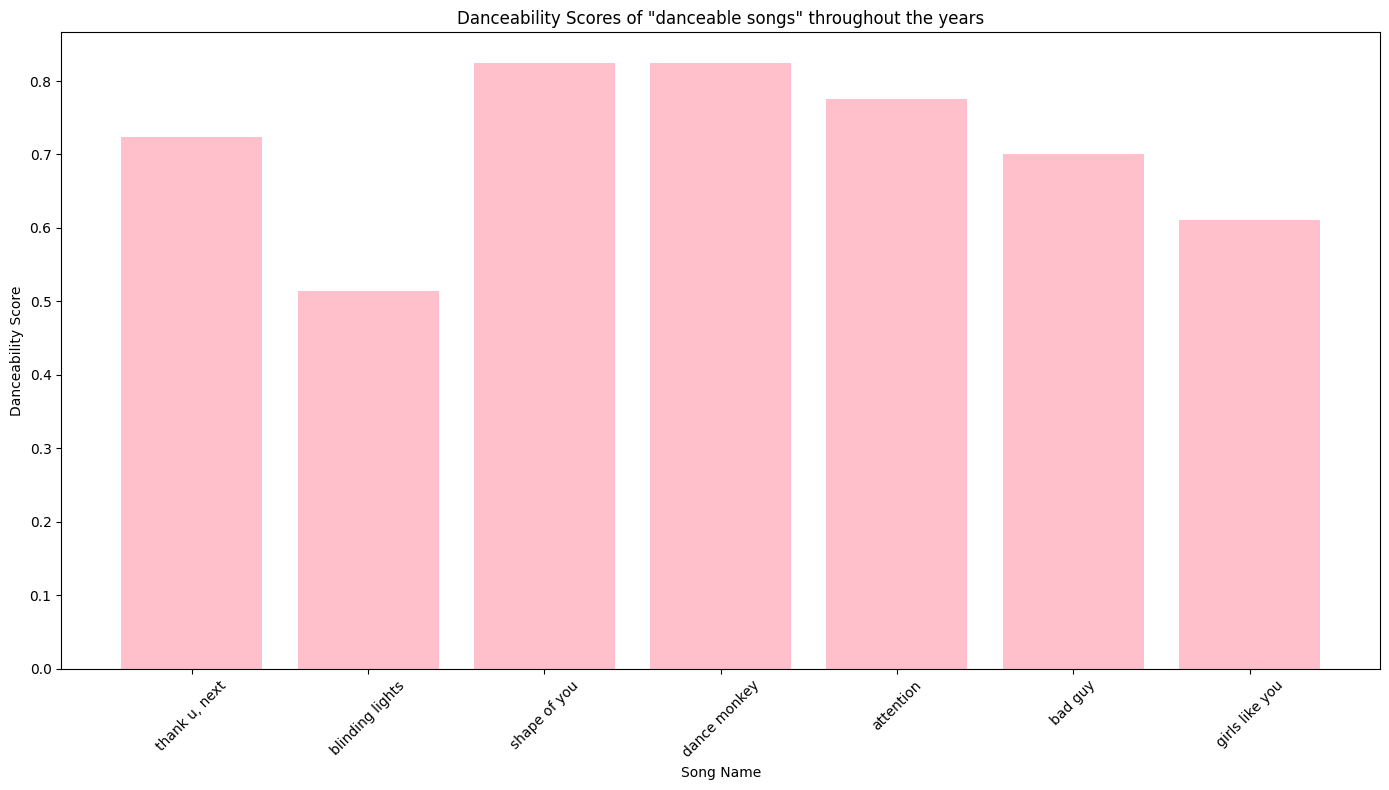

In [267]:
positive_songs_pastYears = ['closer', "it aint me", "attention", "havana", "shape of you", "friends", "girls like you", "taki taki",
                        'thank u, next', 'bad guy', 'Senorita', 'dance monkey', 'blinding lights', 'wap']


# this array is defined because there are same song titles 
artist_name = ['The Chainsmokers', 'Kygo', 'Charlie Puth', 'Camila Cabello', 'Ed Sheeran', 'Marshmello', 'Maroon 5', 'DJ Snake',
               'Ariana Grande', 'Billie Eilish', 'Shawn Mendes', 'Tones And I', 'The Weeknd', 'Cardi B']

songs_artists_dict = dict(zip(positive_songs_pastYears, artist_name))

positive_song_artists = pd.DataFrame(list(songs_artists_dict.items()), columns=['Title', 'Artist'])

# Merge the spotifySpecifics data to get positive values
# with positive_song_artists
filtered_data = spotifySpecifics_data.merge(positive_song_artists, how='inner', on=['Title', 'Artist'])

bar_data = filtered_data[['Title', 'danceability']]

plt.figure(figsize=(14, 8))  
plt.bar(bar_data['Title'], bar_data['danceability'], color='pink')
plt.xlabel('Song Name')
plt.ylabel('Danceability Score')
plt.title('Danceability Scores of "danceable songs" throughout the years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

# Observations made (no.3): 

So it seems like everyone just likes to dance for some reason, so let's see if this trend holds up by finding
the most danceable song and comparing it's statistics against Shape of You by Ed Sheeran, to see if it's a numbers game. 

In [268]:
# Finding the most danceable song
mostDancy_score = spotifySpecifics_data['danceability'].max()
mostDancy_song = spotifySpecifics_data[spotifySpecifics_data['danceability'] == mostDancy_score]

In [269]:
print(mostDancy_song['Title'].values[0])
print('BY')
print(mostDancy_song['Artist'].values[0])

generous
BY
Olivia Holt


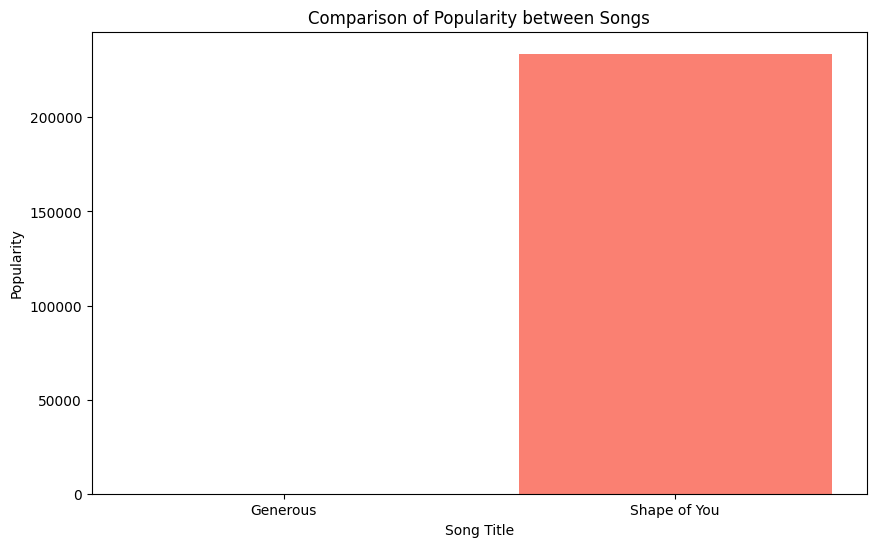

In [270]:
dancySong_title = 'Generous'
popularSong_title = 'Shape of You'

# Extract data for each song
dancySong_data = spotifySpecifics_data[spotifySpecifics_data['Title'].str.lower() == dancySong_title.lower()]
popularSong_data = spotifySpecifics_data[spotifySpecifics_data['Title'].str.lower() == popularSong_title.lower()]

# Find the maximum popularity values
dancySong_max_value = dancySong_data['Popularity'].max()
popularSong_max_value = popularSong_data['Popularity'].max()

# Prepare data for plotting
comparison = pd.DataFrame({
    'Title': [dancySong_title, popularSong_title],
    'Popularity': [dancySong_max_value, popularSong_max_value]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(comparison['Title'], comparison['Popularity'], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Song Title')
plt.ylabel('Popularity')
plt.title('Comparison of Popularity between Songs')

# Show the plot
plt.show()

In [271]:
dancySong_title = 'Generous'

dancySong_data = spotifySpecifics_data[spotifySpecifics_data['Title'].str.lower() == dancySong_title.lower()]

max_value = dancySong_data['Popularity'].max()

print(f"The Popularity for '{dancySong_title}' is {max_value}.")

The Popularity for 'Generous' is 39.2.


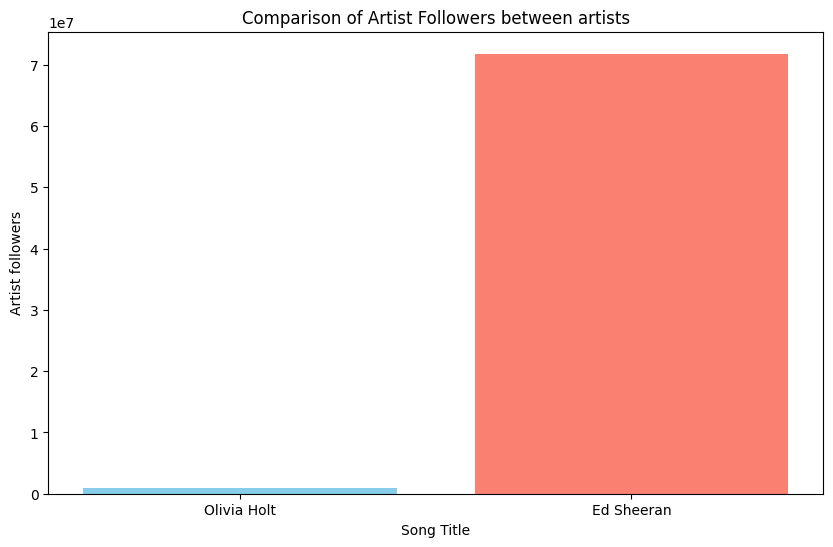

In [272]:
dancySong_artist = 'Olivia Holt'
popularSong_artist = 'Ed Sheeran'

# Extract data for each song
dancySong_data = spotifySpecifics_data[spotifySpecifics_data['Artist'].str.lower() == dancySong_artist.lower()]
popularSong_data = spotifySpecifics_data[spotifySpecifics_data['Artist'].str.lower() == popularSong_artist.lower()]

# Find the maximum popularity values
dancySong_max_value = dancySong_data['Artist_followers'].max()
popularSong_max_value = popularSong_data['Artist_followers'].max()

# Prepare data for plotting
comparison = pd.DataFrame({
    'Title': [dancySong_artist, popularSong_artist],
    'Artist_followers': [dancySong_max_value, popularSong_max_value]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(comparison['Title'], comparison['Artist_followers'], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Song Title')
plt.ylabel('Artist followers')
plt.title('Comparison of Artist Followers between artists')

# Show the plot
plt.show()

In [273]:
dancySong_artist = 'Olivia Holt'

dancySong_data = spotifySpecifics_data[spotifySpecifics_data['Artist'].str.lower() == dancySong_artist.lower()]

max_value = dancySong_data['Artist_followers'].max()

print(f"The artist followers for '{dancySong_artist}' is {max_value}.")

The artist followers for 'Olivia Holt' is 904353.0.


# Now let's take a look at Genres

Surely Mr Sheeran's success could be attributed to the fact that he only releases Pop songs

(-1.0999986660962282,
 1.099999936480766,
 -1.099999999996161,
 1.0999999999998171)

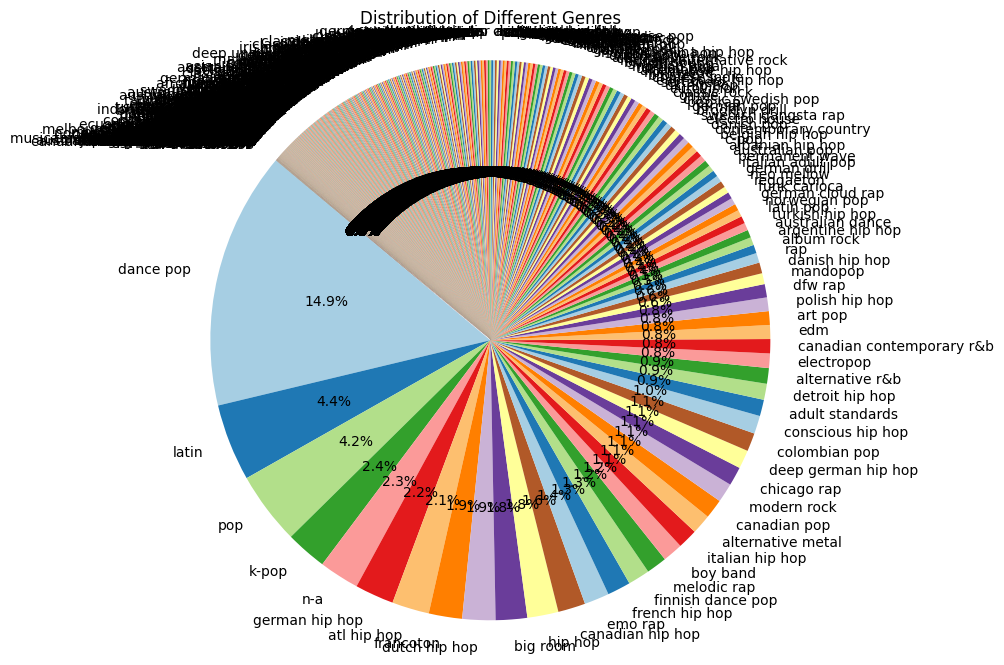

In [276]:
genre_counts = spotifySpecifics_data['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Different Genres')

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Observations made (no.4): 

Again, seems like dance in ON TOP 

Let's look at some statistics on dance pop music

In [284]:
# Filter the data for "Dance Pop" genre
dance_pop_data = spotifySpecifics_data[spotifySpecifics_data['Genre'].str.lower() == 'dance pop']

# Find the song with the highest popularity score
most_popular_dance_pop = dance_pop_data.loc[dance_pop_data['Popularity'].idxmax()]

# Display the result
print("The most popular Dance Pop song is:")
print(f"Title: {most_popular_dance_pop['Title']}")
print(f"Artist: {most_popular_dance_pop['Artist']}")
print(f"Popularity: {most_popular_dance_pop['Popularity']}")

The most popular Dance Pop song is:
Title: something just like this
Artist: The Chainsmokers - Coldplay
Popularity: 198230.15


go girl.. give us nothing

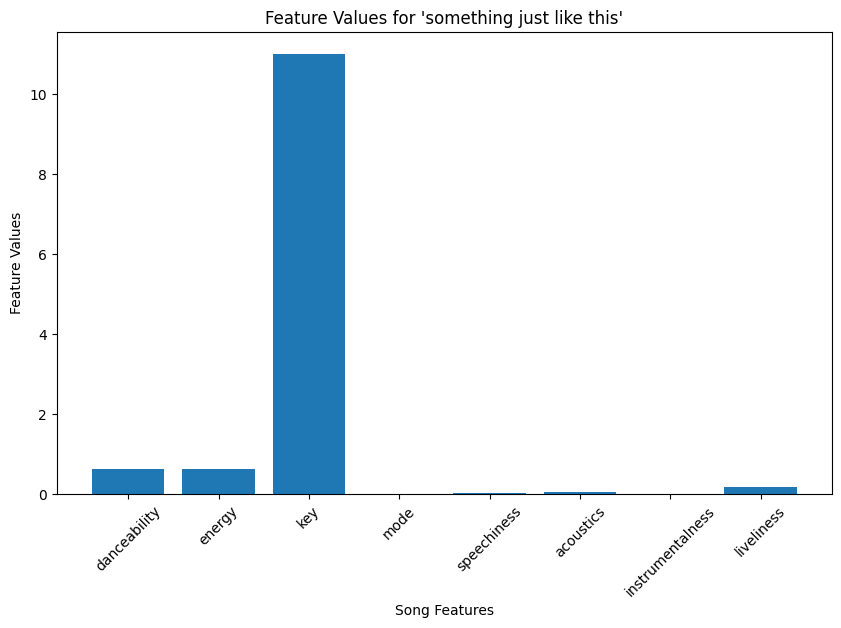

In [290]:
song_features_columns = ['danceability', 'energy', 'key', 'mode',
                        'speechiness', 'acoustics', 'instrumentalness', 'liveliness']

# Select the features directly from the Series
popular_dancePop_songFeatures = most_popular_dance_pop[song_features_columns]

# Plotting the features
plt.figure(figsize=(10, 6))
plt.bar(popular_dancePop_songFeatures.index, popular_dancePop_songFeatures.values)

# Adding labels and title
plt.xlabel('Song Features')
plt.ylabel('Feature Values')
plt.title(f"Feature Values for '{most_popular_dance_pop['Title']}'")
plt.xticks(rotation=45)
plt.show()

# Let's look at emotions

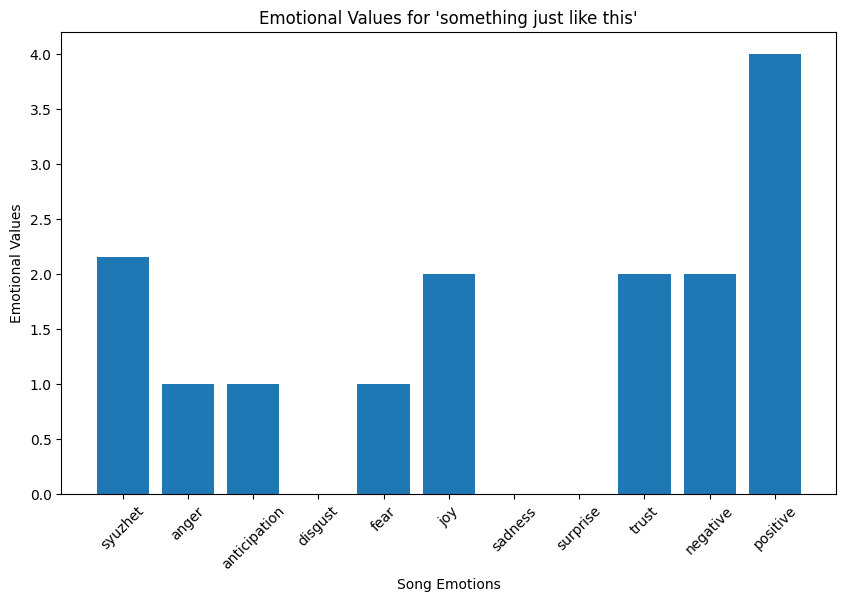

In [293]:
song_features_columns = ['syuzhet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 
                        'surprise', 'trust',	'negative', 'positive']


popular_dancePop_songFeatures = most_popular_dance_pop[song_features_columns]

# Adding labels and title
plt.figure(figsize=(10, 6))
plt.bar(popular_dancePop_songFeatures.index, popular_dancePop_songFeatures.values)

plt.xlabel('Song Emotions')
plt.ylabel('Emotional Values')
plt.title(f"Emotional Values for '{most_popular_dance_pop['Title']}'")
plt.xticks(rotation=45)
plt.show()

# Observations made (no.5): 

Funnily enough, the most popular 'dance pop' song has no danceability at all, but it did show something quite on trend
which is the high positivity once again. So with that note, let's take a look at how a positive song correlates with its popularity.

             Title                 Artist  positive
2       adan y eva           Paulo Londra       NaN
5       adan y eva           Paulo Londra       NaN
7       adan y eva           Paulo Londra       NaN
9       adan y eva           Paulo Londra       NaN
10      adan y eva           Paulo Londra       NaN
...            ...                    ...       ...
168785         怪美的             Jolin Tsai       NaN
168941      change                   E.SO       1.0
169318          還願  No Party For Cao Dong       NaN
169385      change                   E.SO       1.0
170236       偷故事的人            A-Mei Chang       NaN

[2649 rows x 3 columns]


c:\Users\casmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35498 (\N{CJK UNIFIED IDEOGRAPH-8AAA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\casmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\casmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\casmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21741 (\N{CJK UNIFIED IDEOGRAPH-54ED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\casmi\AppData\Local\Programs\Python

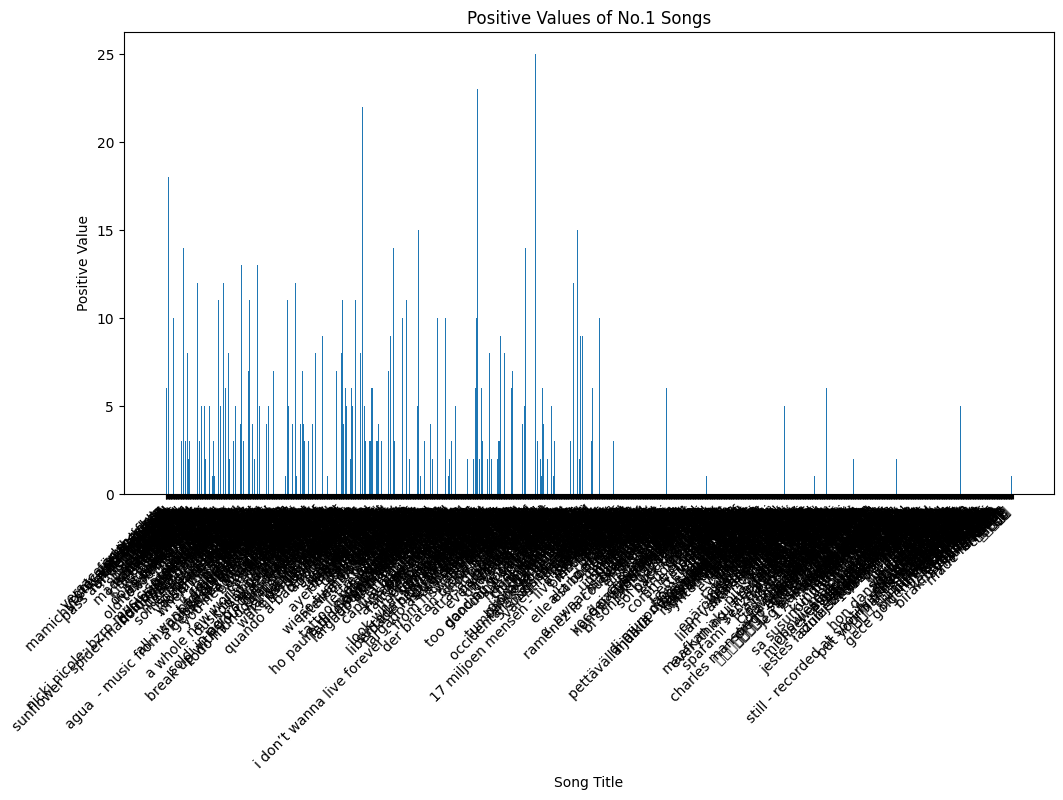

In [294]:
no1_songs = spotifySpecifics_data[spotifySpecifics_data['Popu_max'] == 1]

# Extracting relevant columns: Title, Artist, and Positive value
no1_positive_values = no1_songs[['Title', 'Artist', 'positive']]

# Display the result
print(no1_positive_values)

plt.figure(figsize=(12, 6))
plt.bar(no1_positive_values['Title'], no1_positive_values['positive'])
plt.xlabel('Song Title')
plt.ylabel('Positive Value')
plt.title('Positive Values of No.1 Songs')
plt.xticks(rotation=45, ha="right")
plt.show()

                 Title                       Artist  positive
1391        youngblood          5 Seconds of Summer       3.0
1411        youngblood          5 Seconds of Summer       3.0
1720            psycho  Post Malone - Ty Dolla $ign       0.0
1725            psycho  Post Malone - Ty Dolla $ign       0.0
1728            psycho  Post Malone - Ty Dolla $ign       0.0
...                ...                          ...       ...
147526      happy days                        Ghali       2.0
150624     without you                      高爾宣 OSN       2.0
157496  please dont go                        SIX60       2.0
168941          change                         E.SO       1.0
169385          change                         E.SO       1.0

[506 rows x 3 columns]


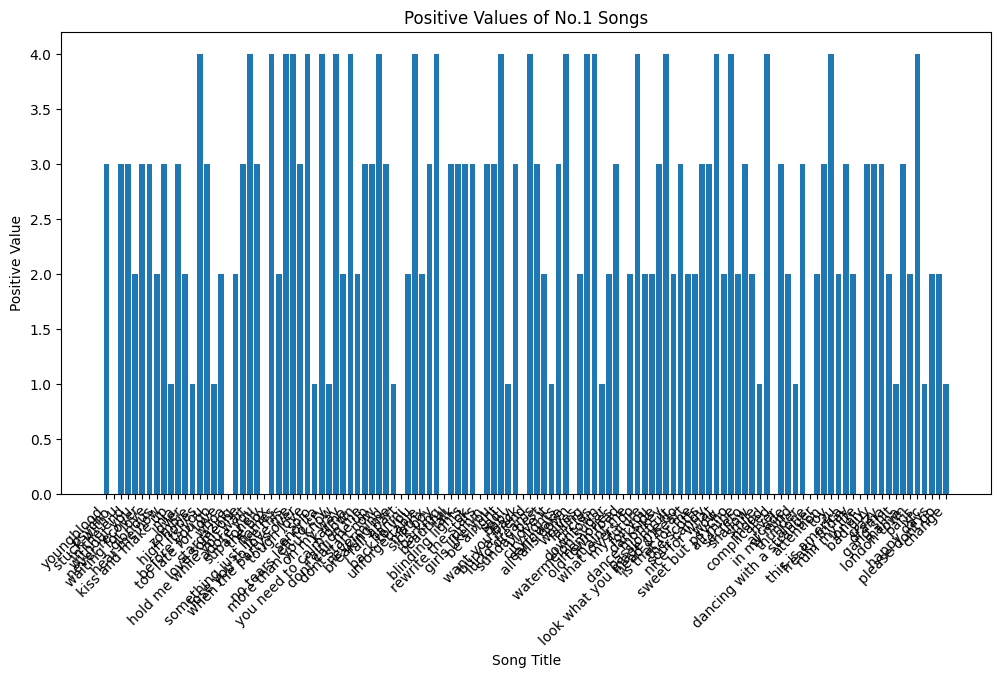

In [296]:
no1_songs = spotifySpecifics_data[spotifySpecifics_data['Popu_max'] == 1]

low_positive_no1 = no1_songs[no1_songs['positive'] < 5]

# Extracting relevant columns: Title, Artist, and Positive value
low_positive_no1_values = low_positive_no1[['Title', 'Artist', 'positive']]

# Display the result
print(low_positive_no1_values)


plt.figure(figsize=(12, 6))
plt.bar(low_positive_no1_values['Title'], low_positive_no1_values['positive'])
plt.xlabel('Song Title')
plt.ylabel('Positive Value')
plt.title('Positive Values of No.1 Songs')
plt.xticks(rotation=45, ha="right")
plt.show()

                   Title                                             Artist  \
1720              psycho                        Post Malone - Ty Dolla $ign   
1725              psycho                        Post Malone - Ty Dolla $ign   
1728              psycho                        Post Malone - Ty Dolla $ign   
1746              psycho                        Post Malone - Ty Dolla $ign   
1750              psycho                        Post Malone - Ty Dolla $ign   
10741               whoa                                       XXXTENTACION   
16059         supalonely                              BENEE - Gus Dapperton   
17068             psycho                        Post Malone - Ty Dolla $ign   
17081             psycho                        Post Malone - Ty Dolla $ign   
17092             psycho                        Post Malone - Ty Dolla $ign   
17093             psycho                        Post Malone - Ty Dolla $ign   
17098             psycho                        Post

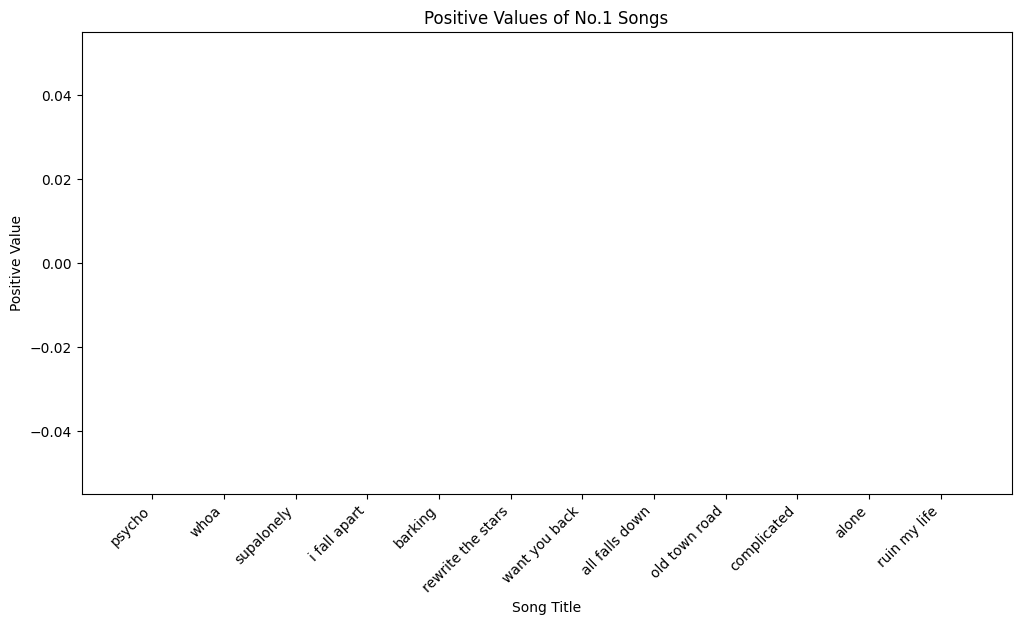

In [297]:
no1_songs = spotifySpecifics_data[spotifySpecifics_data['Popu_max'] == 1]

low_positive_no1 = no1_songs[no1_songs['positive'] < 1]

# Extracting relevant columns: Title, Artist, and Positive value
low_positive_no1_values = low_positive_no1[['Title', 'Artist', 'positive']]

# Display the result
print(low_positive_no1_values)


plt.figure(figsize=(12, 6))
plt.bar(low_positive_no1_values['Title'], low_positive_no1_values['positive'])
plt.xlabel('Song Title')
plt.ylabel('Positive Value')
plt.title('Positive Values of No.1 Songs')
plt.xticks(rotation=45, ha="right")
plt.show()

# Taking a closer look at all these songs , 

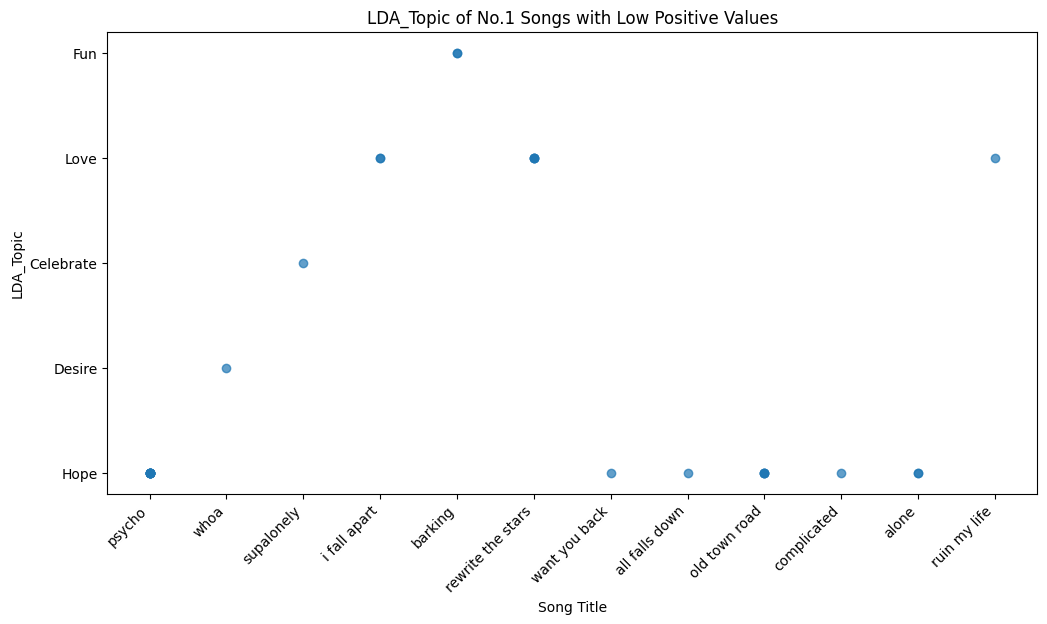

In [301]:
# Filter for no.1 songs with low positive values
no1_songs = spotifySpecifics_data[spotifySpecifics_data['Popu_max'] == 1]
low_positive_no1 = no1_songs[no1_songs['positive'] < 1]

# Extract relevant columns: Title, Artist, Positive value, and LDA_Topic
low_positive_LDA_topics = low_positive_no1[['Title', 'Artist', 'positive', 'LDA_Topic']]

# Display the result as a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(low_positive_LDA_topics['Title'], low_positive_LDA_topics['LDA_Topic'], alpha=0.7)
plt.xlabel('Song Title')
plt.ylabel('LDA_Topic')
plt.title('LDA_Topic of No.1 Songs with Low Positive Values')
plt.xticks(rotation=45, ha="right")
plt.show()

In [316]:
mostPopular_song = spotifySpecifics_data.loc[spotifySpecifics_data['Popularity'].idxmax()]

# Find the LDA_Topic
popular_songName = mostPopular_song['Title']
popular_songTheme = mostPopular_song['LDA_Topic']

print("Title of song: ", popular_songName)
print(f"Theme: {popular_songTheme}")

Title of song:  shape of you
Theme: Love


# Conclusion

I suppose there are many more aspects to be looked into, such as other emotions and other factors such as the negative factor as well, but
I think it's safe to say that Romantic, Hopeful, Danceability songs are on TOP !

# Thank you for your time!